In [2]:
import os
import numpy as np
import cv2
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Set the path to the dataset directory
dataset_dir = "./leaf_diseases"

# Define the image dimensions
img_width = 256
img_height = 256

# Initialize the data and label arrays
X = []
y = []

# Loop over each subdirectory in the dataset directory
for class_dir in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_dir)
    
    # Loop over each image in the class directory
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        
        # Load the image and resize it to the desired dimensions
        image = cv2.imread(image_path)
        image = cv2.resize(image, (img_width, img_height))
        
        # Append the image and class label to the data and label arrays
        X.append(image)
        y.append(class_dir)

# Convert the data and label arrays to numpy arrays
X = np.array(X)
y = np.array(y)

# Initialize the classifiers
rf_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier()
nb_clf = GaussianNB()

# Define the number of folds for cross-validation
n_splits = 5

# Initialize the KFold object
kfold = KFold(n_splits=n_splits, shuffle=True)

# Loop over each fold
for fold_idx, (train_index, test_index) in enumerate(kfold.split(X)):
    print("Fold: ", fold_idx+1)
    
    # Split the data and label arrays into training and testing subsets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Reshape the data arrays to 1D arrays
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)
    
    # Train and test the Random Forest classifier
    rf_clf.fit(X_train, y_train)
    rf_acc = rf_clf.score(X_test, y_test)
    print("Random Forest accuracy: ", rf_acc)
    
    # Train and test the KNN classifier
    knn_clf.fit(X_train, y_train)
    knn_acc = knn_clf.score(X_test, y_test)
    print("KNN accuracy: ", knn_acc)
    
    # Train and test the Decision Tree classifier
    dt_clf.fit(X_train, y_train)
    dt_acc = dt_clf.score(X_test, y_test)
    print("Decision Tree accuracy: ", dt_acc)
    
    # Train and test the Naive Bayes classifier
    nb_clf.fit(X_train, y_train)
    nb_acc = nb_clf.score(X_test, y_test)
    print("Naive Bayes accuracy: ", nb_acc)
    
    print("\n")


Fold:  1
Random Forest accuracy:  0.86125
KNN accuracy:  0.69
Decision Tree accuracy:  0.69
Naive Bayes accuracy:  0.53375


Fold:  2
Random Forest accuracy:  0.875
KNN accuracy:  0.6575
Decision Tree accuracy:  0.69875
Naive Bayes accuracy:  0.5575


Fold:  3
Random Forest accuracy:  0.865
KNN accuracy:  0.655
Decision Tree accuracy:  0.67375
Naive Bayes accuracy:  0.5525


Fold:  4
Random Forest accuracy:  0.87875
KNN accuracy:  0.6575
Decision Tree accuracy:  0.6775
Naive Bayes accuracy:  0.5525


Fold:  5
Random Forest accuracy:  0.87625
KNN accuracy:  0.645
Decision Tree accuracy:  0.65
Naive Bayes accuracy:  0.5325




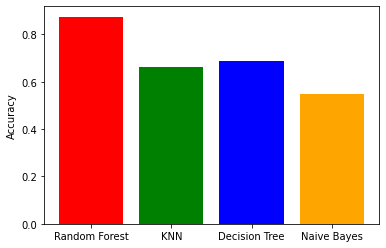

In [4]:
import matplotlib.pyplot as plt

# Define the classifiers and their corresponding colors
classifiers = ["Random Forest", "KNN", "Decision Tree", "Naive Bayes"]
colors = ["red", "green", "blue", "orange"]

# Initialize the accuracy array for each classifier
rf_accs = []
knn_accs = []
dt_accs = []
nb_accs = []

# Loop over each fold
for fold_idx, (train_index, test_index) in enumerate(kfold.split(X)):
    
    # Split the data and label arrays into training and testing subsets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Reshape the data arrays to 1D arrays
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)
    
    # Train and test the classifiers
    rf_clf.fit(X_train, y_train)
    rf_acc = rf_clf.score(X_test, y_test)
    rf_accs.append(rf_acc)
    
    knn_clf.fit(X_train, y_train)
    knn_acc = knn_clf.score(X_test, y_test)
    knn_accs.append(knn_acc)
    
    dt_clf.fit(X_train, y_train)
    dt_acc = dt_clf.score(X_test, y_test)
    dt_accs.append(dt_acc)
    
    nb_clf.fit(X_train, y_train)
    nb_acc = nb_clf.score(X_test, y_test)
    nb_accs.append(nb_acc)

# Initialize the figure and axis objects
fig, ax = plt.subplots()

# Plot the bar chart for each classifier
ax.bar([0, 1, 2, 3], [np.mean(rf_accs), np.mean(knn_accs), np.mean(dt_accs), np.mean(nb_accs)], color=colors)

# Add the labels to the x-axis and y-axis
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(classifiers)
ax.set_ylabel("Accuracy")

# Show the plot
plt.show()


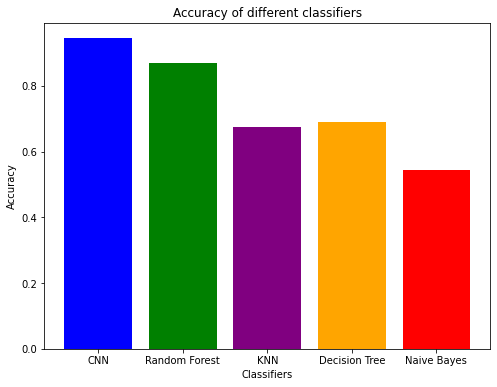

In [6]:
import matplotlib.pyplot as plt
 
# Data
accuracies = [0.9449, 0.87, 0.675, 0.69, 0.5425]
classifiers = ['CNN', 'Random Forest', 'KNN', 'Decision Tree', 'Naive Bayes']
 
colors = ['blue', 'green', 'purple', 'orange', 'red']
 
# Creating axes instance
fig, ax = plt.subplots(figsize=(8, 6))
 
# Creating bar plot
ax.bar(classifiers, accuracies, color=colors)
 
# Set title and labels for axes
ax.set_title('Accuracy of different classifiers')
ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy')
 
# Show plot
plt.show()
